In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as pyplot
import warnings
warnings.filterwarnings('ignore')

In [3]:
dt=pd.read_csv('onlinefraud.csv')

In [5]:
dt.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
dt.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [9]:
dt.shape

(6362620, 11)

In [11]:
dt.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [13]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Convert `type`, `nameOrig`, and `nameDest` using Label Encoding
label_encoder = LabelEncoder()
dt['type_encoded'] = label_encoder.fit_transform(dt['type'])
dt['nameOrig_encoded'] = label_encoder.fit_transform(dt['nameOrig'])
dt['nameDest_encoded'] = label_encoder.fit_transform(dt['nameDest'])

# Drop original non-numeric columns if not needed
dt = dt.drop(columns=["type", "nameOrig", "nameDest"])
print(dt)



         step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0           1     9839.64      170136.00       160296.36            0.00   
1           1     1864.28       21249.00        19384.72            0.00   
2           1      181.00         181.00            0.00            0.00   
3           1      181.00         181.00            0.00        21182.00   
4           1    11668.14       41554.00        29885.86            0.00   
...       ...         ...            ...             ...             ...   
6362615   743   339682.13      339682.13            0.00            0.00   
6362616   743  6311409.28     6311409.28            0.00            0.00   
6362617   743  6311409.28     6311409.28            0.00        68488.84   
6362618   743   850002.52      850002.52            0.00            0.00   
6362619   743   850002.52      850002.52            0.00      6510099.11   

         newbalanceDest  isFraud  isFlaggedFraud  type_encoded  \
0                  0.

In [17]:
dt.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_encoded,nameOrig_encoded,nameDest_encoded
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06,1.714150e+00,3.176678e+06,7.464270e+05
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03,1.350117e+00,1.834064e+06,7.502455e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.588332e+06,2.168950e+05
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00,1.000000e+00,3.176672e+06,4.322890e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00,3.000000e+00,4.765048e+06,1.132509e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00,4.000000e+00,6.353306e+06,2.722361e+06


In [19]:
from sklearn.preprocessing import StandardScaler
# Select float columns
float_columns = dt.select_dtypes(include=['float']).columns

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the float columns
dt[float_columns] = scaler.fit_transform(dt[float_columns])

# Convert scaled values to integers
dt[float_columns] = dt[float_columns].astype(int)

In [21]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column            Dtype
---  ------            -----
 0   step              int64
 1   amount            int32
 2   oldbalanceOrg     int32
 3   newbalanceOrig    int32
 4   oldbalanceDest    int32
 5   newbalanceDest    int32
 6   isFraud           int64
 7   isFlaggedFraud    int64
 8   type_encoded      int32
 9   nameOrig_encoded  int32
 10  nameDest_encoded  int32
dtypes: int32(8), int64(3)
memory usage: 339.8 MB


In [23]:
dt.isnull().sum()

step                0
amount              0
oldbalanceOrg       0
newbalanceOrig      0
oldbalanceDest      0
newbalanceDest      0
isFraud             0
isFlaggedFraud      0
type_encoded        0
nameOrig_encoded    0
nameDest_encoded    0
dtype: int64

Logistic Regression

In [25]:
#
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Features (X) and Target (y)
X = dt.drop(columns=["isFlaggedFraud"])  # Drop the target column
y = dt["isFlaggedFraud"]  # Target column

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9999976424806133
Confusion Matrix:
 [[1272521       0]
 [      3       0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.00      0.00      0.00         3

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



In [ ]:
import matplolib as pyplot
  

Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
# Prepare the features (X) and target (y)
X = dt.drop(['isFlaggedFraud'], axis=1)
y = dt['isFlaggedFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Scale the features (optional for decision trees, but useful if you're comparing with other models)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=60)

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

# Print classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9999960708010223
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.25      0.33      0.29         3

    accuracy                           1.00   1272524
   macro avg       0.62      0.67      0.64   1272524
weighted avg       1.00      1.00      1.00   1272524



Random Tree


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
# Prepare the features (X) and target (y)
X = dt.drop(['isFlaggedFraud'], axis=1)
y = dt['isFlaggedFraud']
#
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# instalization
model = RandomForestClassifier(n_estimators=10, max_depth=None,
    min_samples_split=2, random_state=0)
#Trrain the model
model.fit(X_train, y_train)
# pre
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.9999976424806133
Confusion Matrix:
 [[1272521       0]
 [      3       0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.00      0.00      0.00         3

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



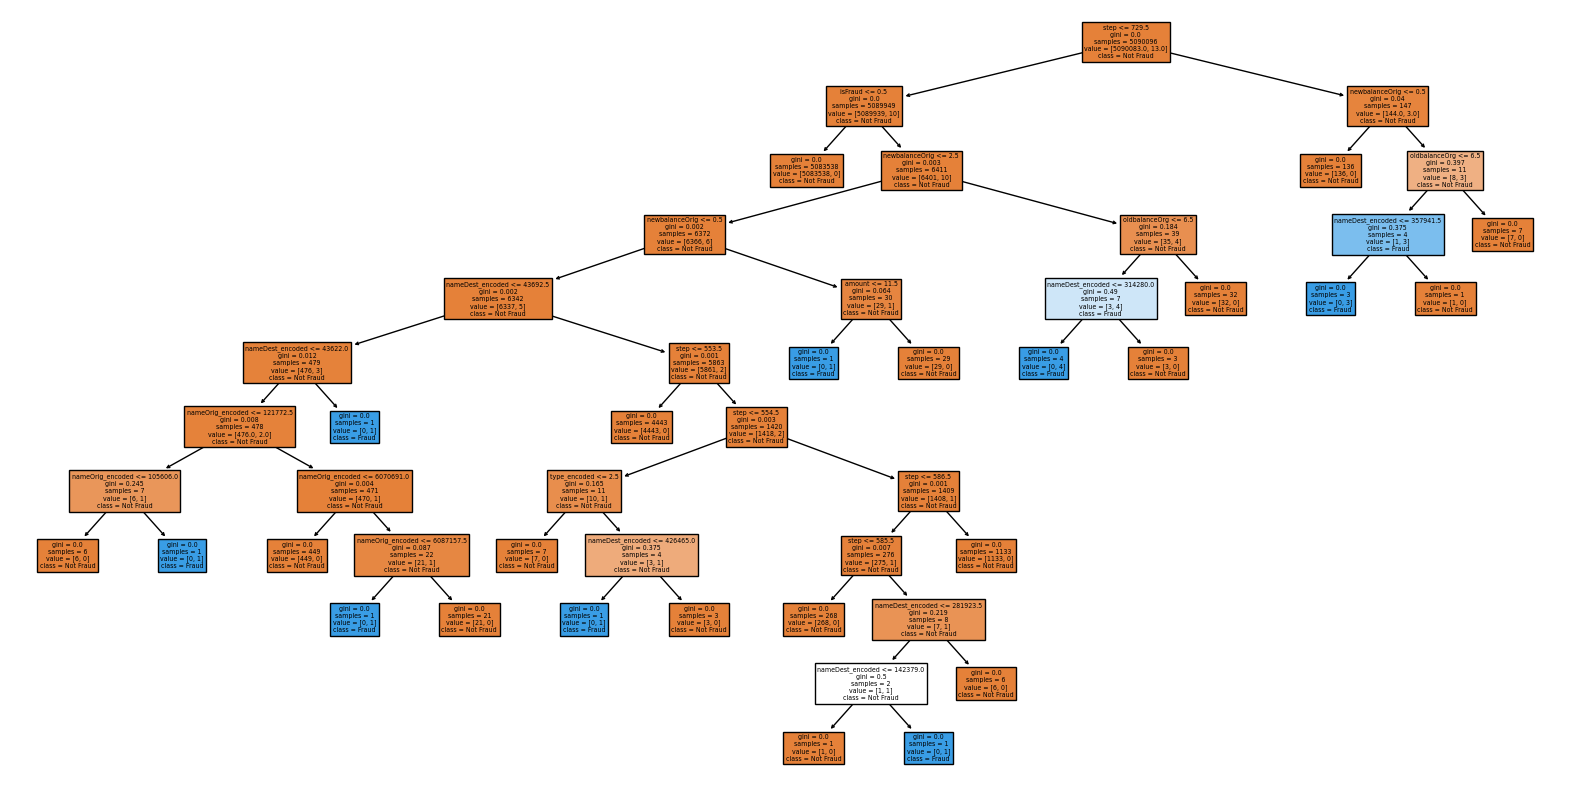

In [80]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=['Not Fraud', 'Fraud'], filled=True)
plt.show()


XGboost


In [54]:
 !pip install xgboost

In [58]:
import xgboost
print(xgboost.__version__)


2.1.3


In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
# Prepare features (X) and target (y)
X = dt.drop(['isFlaggedFraud'], axis=1)
y = dt['isFlaggedFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional for XGBoost, depends on your dataset)
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(
    n_estimators=100,  # Number of trees
    max_depth=6,       # Maximum depth of a tree
    learning_rate=0.1, # Step size for updating weights
    random_state=60,
    use_label_encoder=False  # Avoids warning with newer versions of XGBoost
)

# Train the model
xgb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = xgb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy)

# Classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy:  0.9999976424806133
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.00      0.00      0.00         3

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



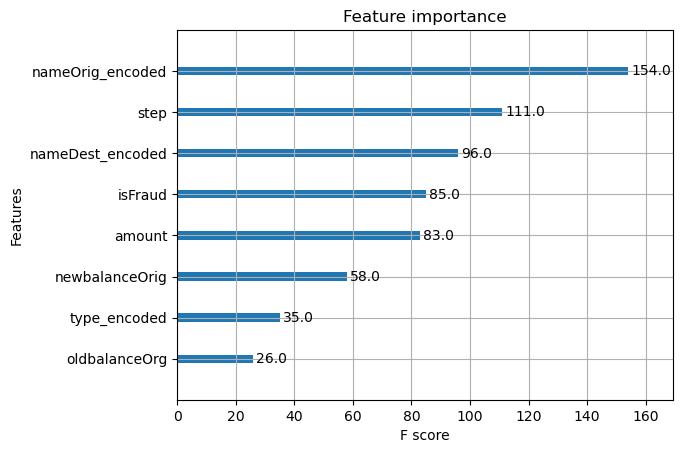

In [78]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_classifier)
plt.show()


AdaBoost

In [36]:
import sklearn
print(sklearn.__version__)


1.4.2


In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
# Prepare the features (X) and target (y)
X = dt.drop(['isFlaggedFraud'], axis=1)
y = dt['isFlaggedFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Scale the features (optional, not necessary for tree-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the base estimator (weak learner)
base_estimator = DecisionTreeClassifier(max_depth=1)  # A "stump" (tree with max_depth=1)

# Initialize the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(
    estimator=base_estimator,  # Use 'estimator' instead of 'base_estimator'
    n_estimators=50,           # Number of weak learners
    learning_rate=1.0,         # Weight applied to each classifier
    random_state=60            # Reproducibility
)

# Train the AdaBoost model
adaboost_classifier.fit(X_train, y_train)

# Make predictions
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.00      0.00      0.00         3

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



GradientBoost

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
# Prepare the features (X) and target (y)
X = dt.drop(['isFlaggedFraud'], axis=1)
y = dt['isFlaggedFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Scale the features (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,       # Number of boosting stages (trees)
    learning_rate=0.1,      # Shrinks contribution of each tree
    max_depth=3,            # Limits depth of the individual trees
    random_state=60         # Reproducibility
)

# Train the Gradient Boosting model
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.00      0.00      0.00         3

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



KNN


In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame
# Prepare the features (X) and target (y)
X = dt.drop(['isFlaggedFraud'], axis=1)
y = dt['isFlaggedFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Scale the features (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,       # Number of boosting stages (trees)
    learning_rate=0.1,      # Shrinks contribution of each tree
    max_depth=3,            # Limits depth of the individual trees
    random_state=60         # Reproducibility
)

# Train the Gradient Boosting model
gb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
 

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.00      0.00      0.00         3

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



NavieBase

In [52]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data' is your DataFrame
# Prepare the features (X) and target (y)
X = dt.drop(['isFlaggedFraud'], axis=1)
y = dt['isFlaggedFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Scale the features (optional, for Gaussian Naive Bayes)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1272521
           1       0.00      1.00      0.01         3

    accuracy                           1.00   1272524
   macro avg       0.50      1.00      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524



SupportVectorMachine

In [3]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'data' is your DataFrame
# Prepare the features (X) and target (y)
X = dt.drop(['isFlaggedFraud'], axis=1)
y = dt['isFlaggedFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

# Scale the features (SVM is distance-based, so scaling is important)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(
    kernel='rbf',         # Kernel type ('linear', 'poly', 'rbf', 'sigmoid')
    C=1.0,                # Regularization parameter
    gamma='scale',        # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    random_state=60       # Ensures reproducibility (for newer versions of scikit-learn)
)

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report for detailed metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


NameError: name 'dt' is not defined